# Uncovering Insights from a Global Technology Sales Dataset

## Data Understanding

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [11]:
data = pd.read_csv(r"global_tech_sales.csv")
data.head()

,OrderID,OrderDate,Region,CustomerSegment,Category,Product,Sales,Quantity,Discount,Profit,ShippingMode
0,ORD10000,2022-05-02,Africa,Enterprise,Accessories,Keyboard,1154.89,8,0.0,230.07,Second Class
1,ORD10001,2023-10-26,Europe,Small Business,Networking,Router,510.18,8,0.0,102.18,Same Day
2,ORD10002,2023-02-18,Asia-Pacific,Enterprise,Smartphones,Samsung Galaxy S22,1970.12,5,0.1,408.70,First Class
3,ORD10003,2022-01-22,Africa,Consumer,Smartphones,Google Pixel 6,676.40,5,0.0,85.27,Same Day
4,ORD10004,2023-05-26,Middle East,Small Business,Software,CRM Tool,70.85,9,0.0,12.84,First Class


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          1000 non-null   object 
 1   OrderDate        1000 non-null   object 
 2   Region           1000 non-null   object 
 3   CustomerSegment  1000 non-null   object 
 4   Category         1000 non-null   object 
 5   Product          1000 non-null   object 
 6   Sales            1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Discount         1000 non-null   float64
 9   Profit           1000 non-null   float64
 10  ShippingMode     1000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


From the information that we have we can observe that we do not have any null values present in our dataset

In [13]:
data.describe()

,Sales,Quantity,Discount,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1491.877340,5.011000,0.148600,220.756060
std,863.451021,2.580996,0.111402,169.238719
min,50.560000,1.000000,0.000000,3.180000
25%,749.422500,3.000000,0.075000,85.072500
50%,1442.125000,5.000000,0.100000,174.995000
75%,2244.712500,7.000000,0.200000,329.747500
max,2998.700000,9.000000,0.300000,785.040000


In [14]:
data.shape

(1000, 11)

## 1. Data Profiling and Quality Assessment.


### 1.1 Load and inspect the dataset.


In [ ]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
#data['Day'] = data['OrderDate'].dt.day

In [65]:
data['Year'] = data['OrderDate'].dt.year
data['Year'].unique()


array([2022, 2023], dtype=int32)

In [66]:
data['Year'].value_counts()

Year
2023    505
2022    495
Name: count, dtype: int64

### 1.2 Identify missing values, duplicates, inconsistent data types, and outliers.


In [15]:
data.isnull().sum()

OrderID            0
OrderDate          0
Region             0
CustomerSegment    0
Category           0
Product            0
Sales              0
Quantity           0
Discount           0
Profit             0
ShippingMode       0
dtype: int64

In [16]:
data.duplicated().sum()

np.int64(0)

### 1.3 Provide a summary of data quality issues.

In our dataset as observed we do not have any data inconsistencies checking th the NULL values and Dulplicated values

In [17]:
data.describe()

,Sales,Quantity,Discount,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1491.877340,5.011000,0.148600,220.756060
std,863.451021,2.580996,0.111402,169.238719
min,50.560000,1.000000,0.000000,3.180000
25%,749.422500,3.000000,0.075000,85.072500
50%,1442.125000,5.000000,0.100000,174.995000
75%,2244.712500,7.000000,0.200000,329.747500
max,2998.700000,9.000000,0.300000,785.040000


## 2. Univariate and Bivariate Analysis (6 Marks)

### 2.1 Univariate Analysis: Histograms, Boxplots, and Countplots to explore individual features like Sales, Profit, Discount, and Category.


#### Sales Analysis

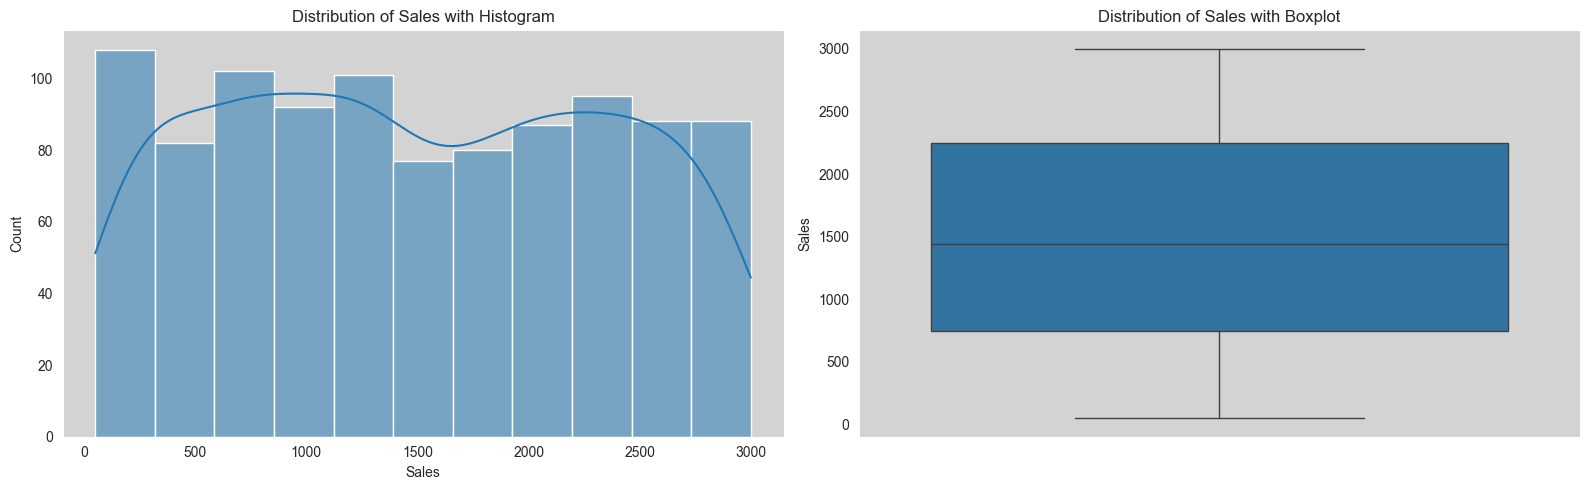

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Plot with Seaborn and then set individual background colors
sns.histplot(data['Sales'], kde=True, ax=axes[0])
axes[0].set_facecolor('lightgrey')
axes[0].set_title('Distribution of Sales with Histogram')

sns.boxplot(data['Sales'], ax=axes[1])
axes[1].set_facecolor('lightgrey')  # Light green
axes[1].set_title('Distribution of Sales with Boxplot')

plt.tight_layout()
plt.show()

#### Profit Analysis

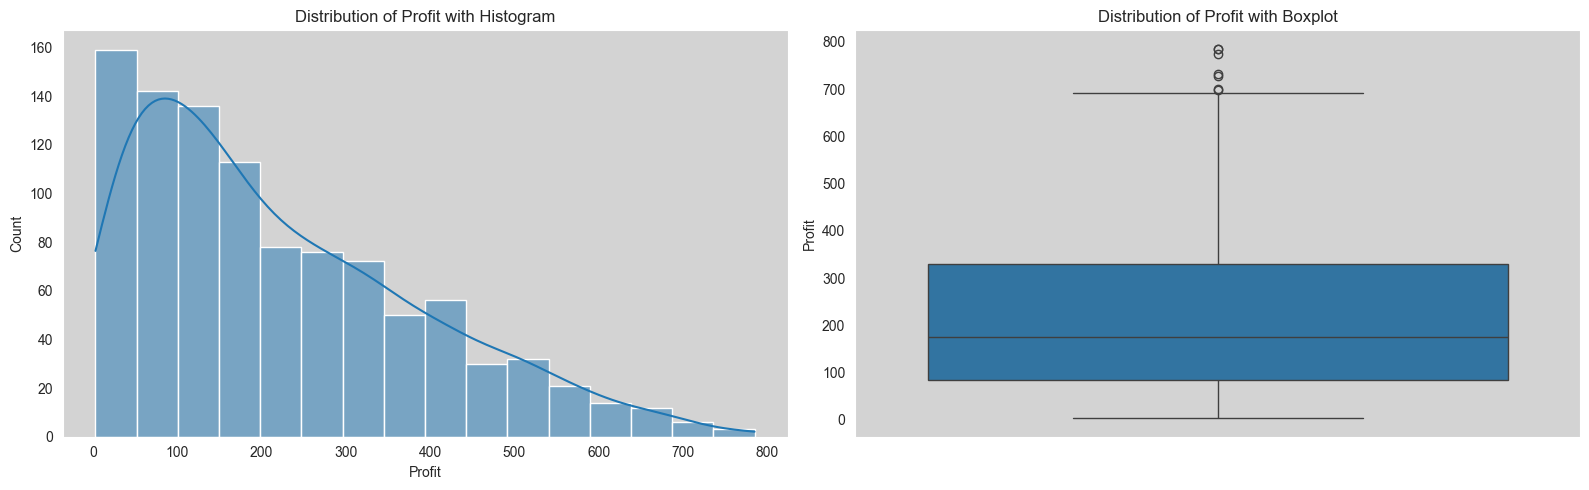

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Plot with Seaborn and then set individual background colors
sns.histplot(data['Profit'], kde=True, ax=axes[0])
axes[0].set_facecolor('lightgrey')
axes[0].set_title('Distribution of Profit with Histogram')

sns.boxplot(data['Profit'], ax=axes[1])
axes[1].set_facecolor('lightgrey')  # Light green
axes[1].set_title('Distribution of Profit with Boxplot')

plt.tight_layout()
plt.show()

#### Discount Analysis

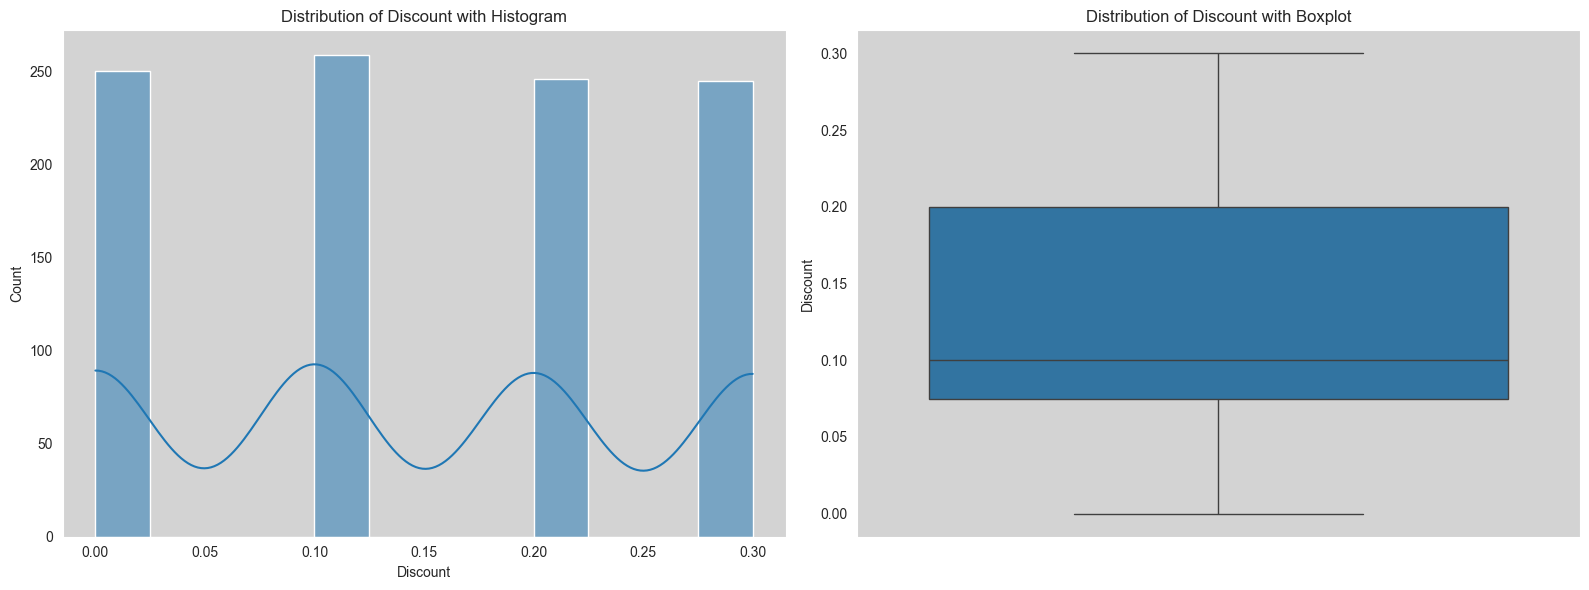

In [139]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot with Seaborn and then set individual background colors
sns.histplot(data['Discount'], kde=True, ax=axes[0])
axes[0].set_facecolor('lightgrey')
axes[0].set_title('Distribution of Discount with Histogram')

sns.boxplot(data['Discount'], ax=axes[1])
axes[1].set_facecolor('lightgrey')  # Light green
axes[1].set_title('Distribution of Discount with Boxplot')

plt.tight_layout()
plt.show()

#### Quantity Analysis

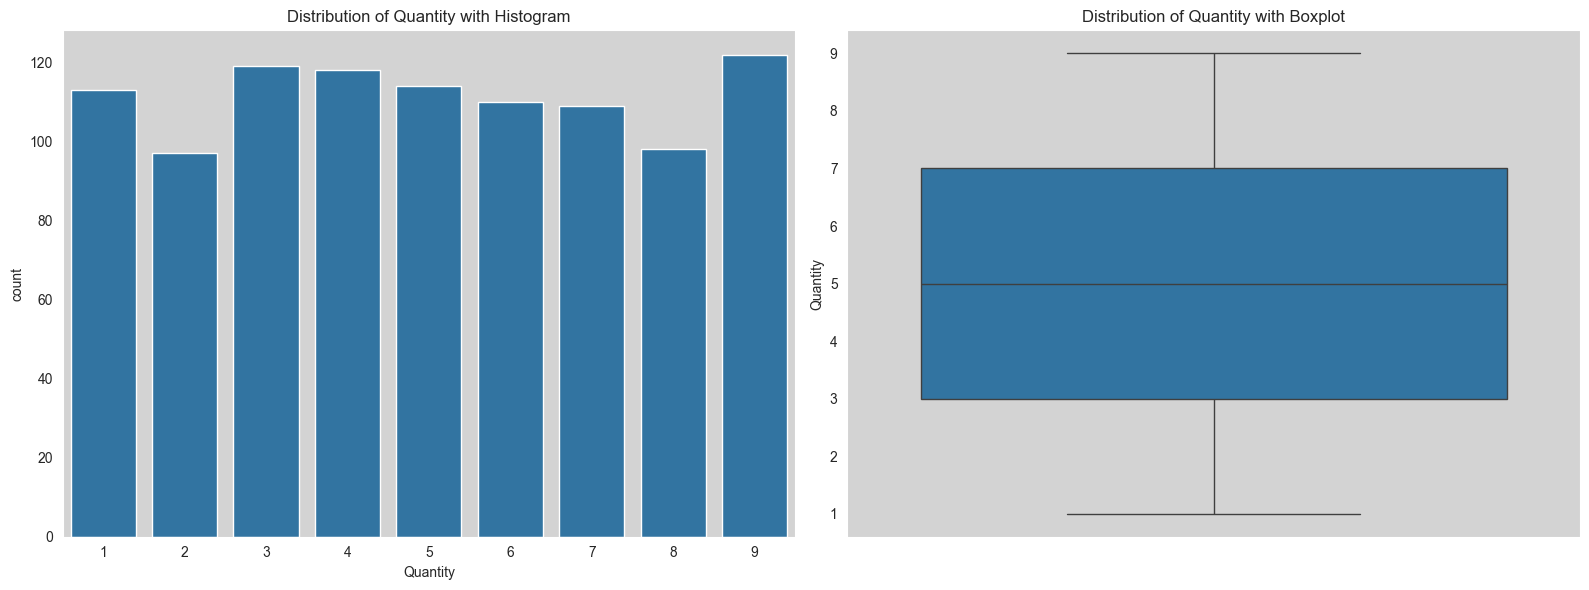

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot with Seaborn and then set individual background colors
sns.countplot(x=data['Quantity'], ax=axes[0])
axes[0].set_facecolor('lightgrey')
axes[0].set_title('Distribution of Quantity with Histogram')


sns.boxplot(data['Quantity'], ax=axes[1])
axes[1].set_facecolor('lightgrey')  # Light green
axes[1].set_title('Distribution of Quantity with Boxplot')

plt.tight_layout()
plt.show()

#### Category Analysis

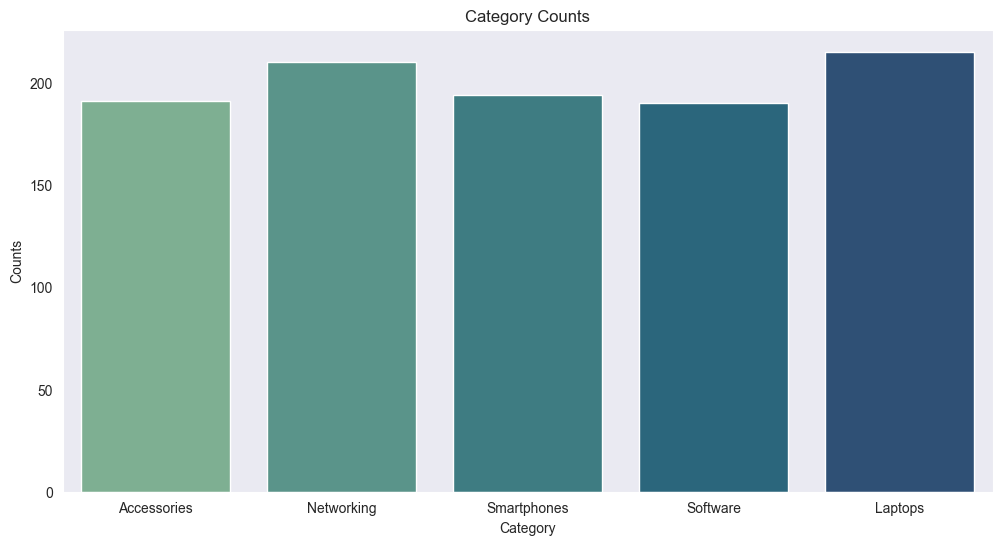

In [133]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Category'], palette='crest', hue=data['Category'])
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.show()

In [24]:
data.head()

,OrderID,OrderDate,Region,CustomerSegment,Category,Product,Sales,Quantity,Discount,Profit,ShippingMode
0,ORD10000,2022-05-02,Africa,Enterprise,Accessories,Keyboard,1154.89,8,0.0,230.07,Second Class
1,ORD10001,2023-10-26,Europe,Small Business,Networking,Router,510.18,8,0.0,102.18,Same Day
2,ORD10002,2023-02-18,Asia-Pacific,Enterprise,Smartphones,Samsung Galaxy S22,1970.12,5,0.1,408.70,First Class
3,ORD10003,2022-01-22,Africa,Consumer,Smartphones,Google Pixel 6,676.40,5,0.0,85.27,Same Day
4,ORD10004,2023-05-26,Middle East,Small Business,Software,CRM Tool,70.85,9,0.0,12.84,First Class


In [59]:
data['ShippingMode'].unique()

array(['Second Class', 'Same Day', 'First Class', 'Standard Class'],
      dtype=object)

In [62]:
data['Category'].unique()

array(['Accessories', 'Networking', 'Smartphones', 'Software', 'Laptops'],
      dtype=object)

In [61]:
data['CustomerSegment'].unique()

array(['Enterprise', 'Small Business', 'Consumer', 'Corporate'],
      dtype=object)

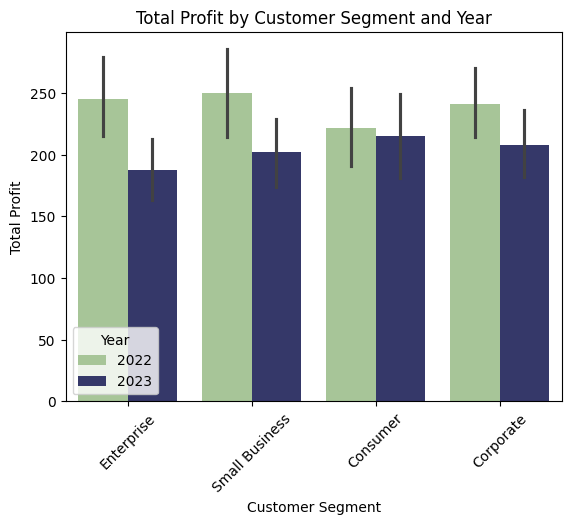

In [ ]:
data['Product'].value_counts()


Product
Google Pixel 6        63
Wireless Mouse        61
iPhone 14             58
HP Spectre            58
Antivirus Pro         56
Lenovo ThinkPad       56
Switch                55
CRM Tool              54
Modem                 54
MacBook Air           53
Firewall Device       52
Router                49
Dell XPS              48
Laptop Bag            46
MS Office             44
Keyboard              42
Headphones            42
OnePlus 9             38
Adobe Suite           36
Samsung Galaxy S22    35
Name: count, dtype: int64

In [32]:
profit_region = data.groupby('Region')['Profit'].sum().reset_index()
profit_region

,Region,Profit
0,Africa,34622.34
1,Asia-Pacific,33642.66
2,Europe,36848.33
3,Middle East,42134.22
4,North America,43130.74
5,South America,30377.77


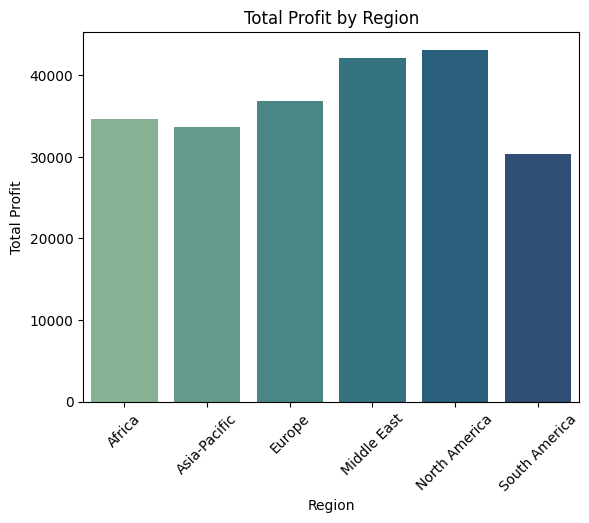

In [33]:
sns.barplot(x='Region', y='Profit', data=profit_region, palette='crest', hue = 'Region')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')
plt.show()

In [29]:
profit_region = data.groupby('Category')['Profit'].sum()
profit_region

Category
Accessories    40666.42
Laptops        50781.62
Networking     44401.62
Smartphones    41410.06
Software       43496.34
Name: Profit, dtype: float64

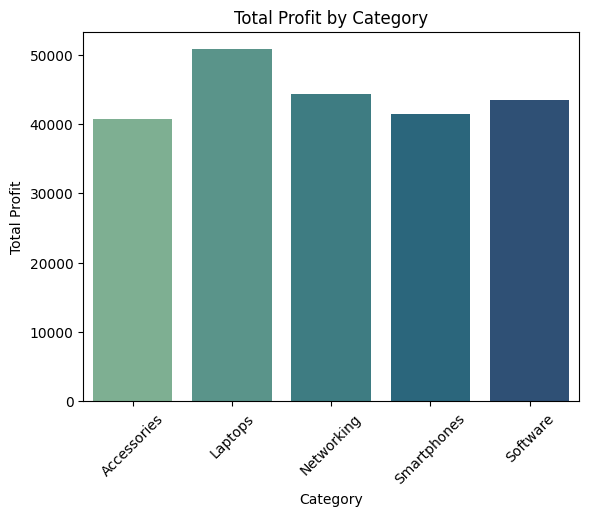

In [31]:
sns.barplot(x=profit_region.index, y=profit_region.values, palette='crest', hue= profit_region.index)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Category')
plt.show()

In [51]:
category_quantity = data.groupby(['Category', 'Region'])['Quantity'].sum()
category_quantity = pd.DataFrame(category_quantity)
category_quantity

Quantity
Category    Region                 
Accessories Africa              165
            Asia-Pacific        154
            Europe              148
            Middle East         131
            North America       217
            South America       158
Laptops     Africa              156
            Asia-Pacific        221
            Europe              170
            Middle East         244
            North America       187
            South America       116
Networking  Africa              161
            Asia-Pacific        181
            Europe              177
            Middle East         176
            North America       192
            South America       172
Smartphones Africa              156
            Asia-Pacific        189
            Europe              150
            Middle East         213
            North America       151
            South America        97
Software    Africa              136
            Asia-Pacific        127
            Europe              194
            Middle East         102
            North America       204
            South America       166

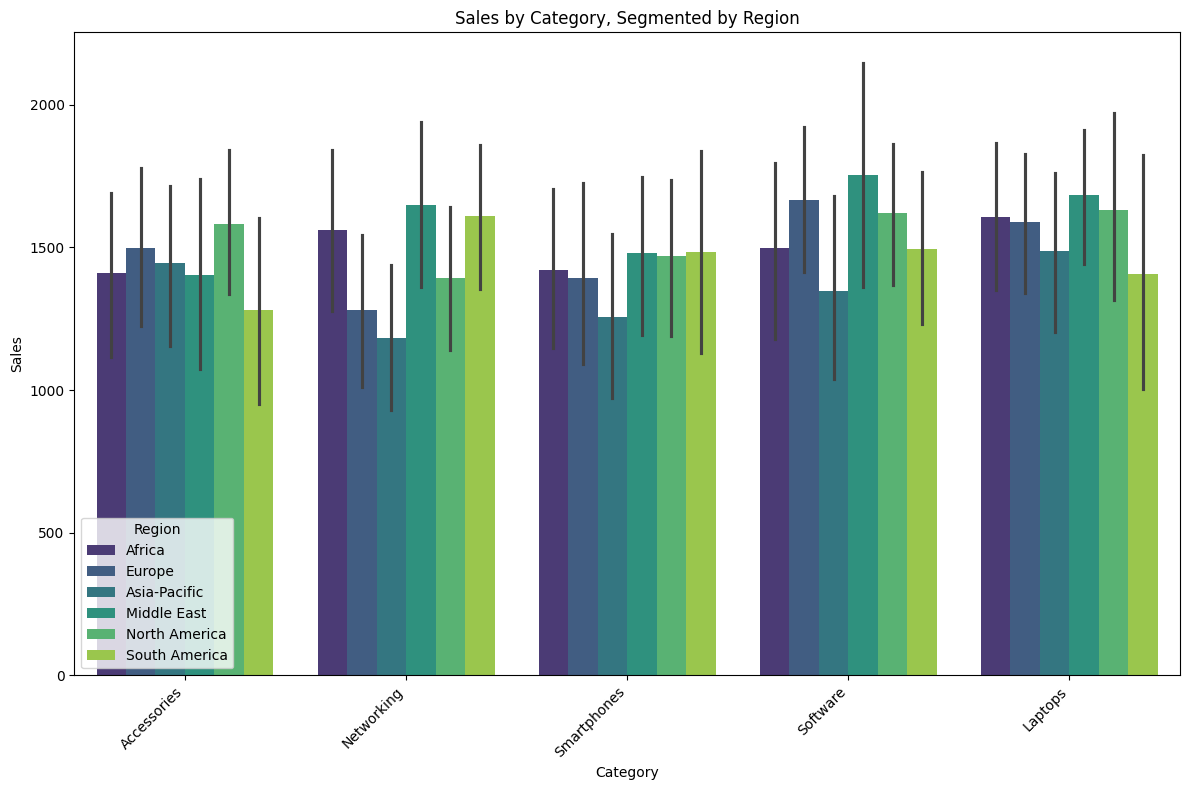

In [55]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Sales', hue='Region', data=data, palette='viridis')
plt.title('Sales by Category, Segmented by Region')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
#plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Profit', hue='Region', data=data, palette='viridis')
plt.title('Sales by Category, Segmented by Region')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
#plt.legend(title='Region')
plt.tight_layout()
plt.show()

### 2.2 Bivariate Analysis: Pairplots, Correlation heatmaps, and Scatterplots to explore relationships between numeric features. 

#### Sales Boxplot Per Year

In [143]:
data['Month'] = data['OrderDate'].dt.month
data['Month'].unique()


array([ 5, 10,  2,  1,  6, 12,  3,  9,  8,  4, 11,  7], dtype=int32)

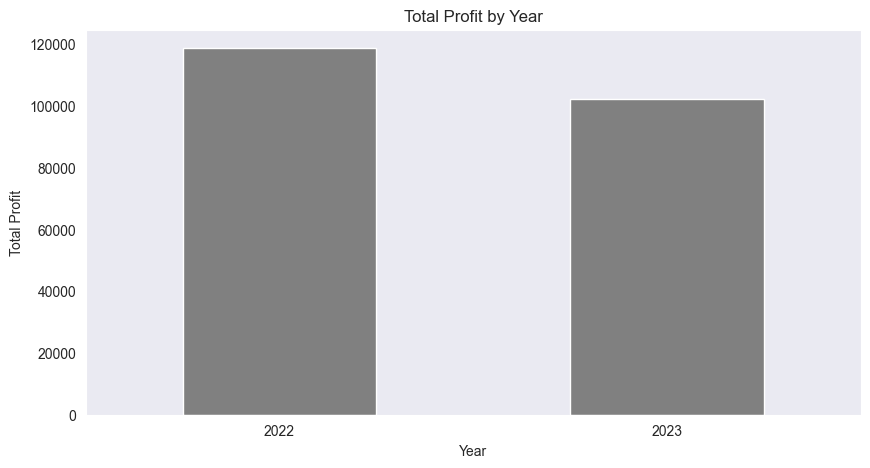

In [141]:
data.groupby(['Year'])['Profit'].sum().plot(kind='bar', figsize=(10, 5), color='grey')
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.show()

In [144]:
data.columns

Index(['OrderID', 'OrderDate', 'Region', 'CustomerSegment', 'Category',
       'Product', 'Sales', 'Quantity', 'Discount', 'Profit', 'ShippingMode',
       'Year', 'Month'],
      dtype='object')

### Numerical vs Numerical

#### Sales :: Visualization: Scatter plot (sns.scatterplot(), plt.scatter()). Correlation coefficient (df[['Sales', 'Quantity']].corr()).

##### Profit vs. Quantity:
Relationship: Generally, we expect a positive correlation: as the quantity of items in an order increases, the total sales value tends to increase as well. However, discounts for bulk orders or different product prices could influence this.

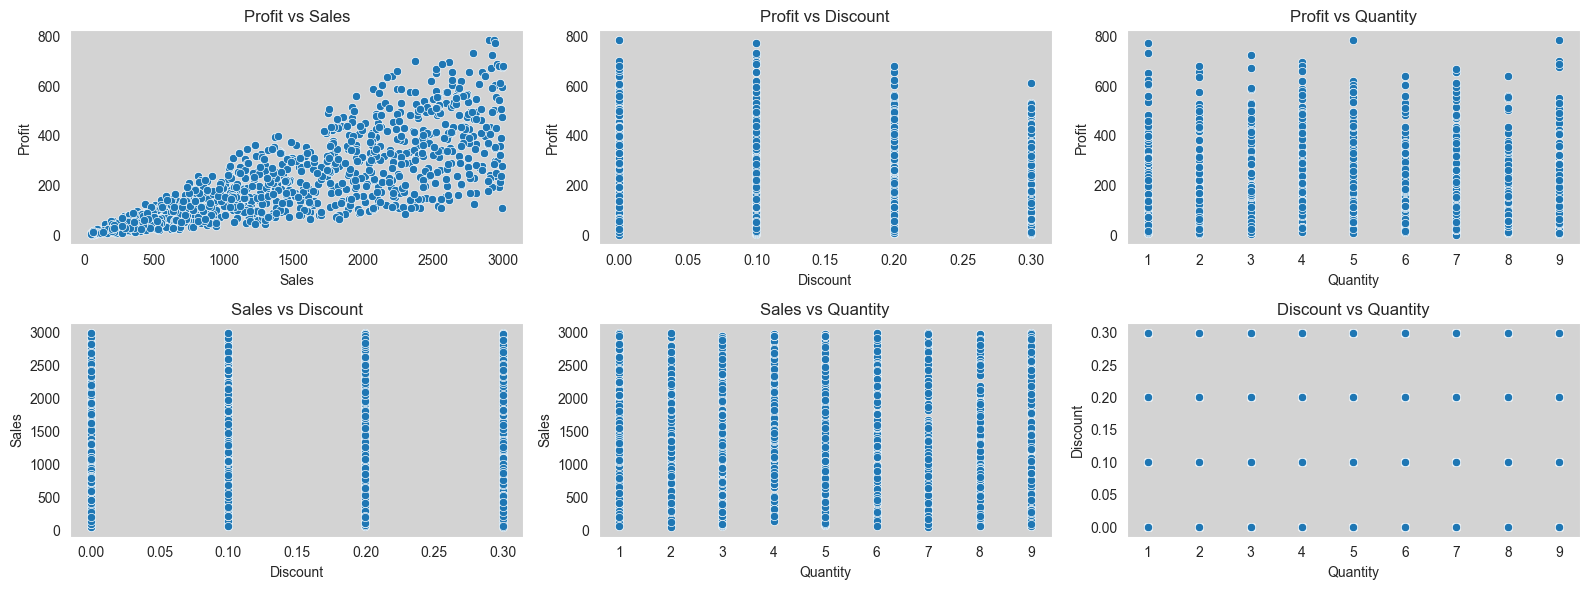

In [167]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))




# Plot with Seaborn and then set individual background colors
sns.scatterplot(x=data['Sales'], y=data['Profit'], ax=axes[0, 0])
axes[0, 0].set_facecolor('lightgrey')
axes[0, 0].set_title('Profit vs Sales')


sns.scatterplot(x=data['Discount'], y=data['Profit'], ax=axes[0, 1])
axes[0, 1].set_facecolor('lightgrey')  # Light green
axes[0, 1].set_title('Profit vs Discount')

sns.scatterplot(x=data['Quantity'], y=data['Profit'], ax=axes[0, 2])
axes[0, 2].set_facecolor('lightgrey')
axes[0, 2].set_title('Profit vs Quantity')


sns.scatterplot(x=data['Discount'], y=data['Sales'], ax=axes[1, 0])
axes[1, 0].set_facecolor('lightgrey')  # Light green
axes[1, 0].set_title('Sales vs Discount')

sns.scatterplot(x=data['Quantity'], y=data['Sales'], ax=axes[1, 1])
axes[1, 1].set_facecolor('lightgrey')
axes[1, 1].set_title('Sales vs Quantity')


sns.scatterplot(x=data['Quantity'], y=data['Discount'], ax=axes[1, 2])
axes[1, 2].set_facecolor('lightgrey')  # Light green
axes[1, 2].set_title('Discount vs Quantity')

plt.tight_layout()
plt.show()

Sales vs. Discount:
Relationship: We might expect a negative correlation: higher discounts could lead to lower overall sales revenue per unit, although they might drive higher quantities sold.
Visualization: Scatter plot (sns.scatterplot(), plt.scatter()).


Sales vs. Profit:
Relationship: We expect a positive correlation: higher sales generally lead to higher profit, assuming costs and discounts are managed. However, high discounts or high costs of goods sold could weaken this relationship.
Visualization: Scatter plot (sns.scatterplot(), plt.scatter()).

#### Quantity

Quantity vs. Discount:
Relationship: Businesses might offer higher discounts for larger quantities purchased. This would suggest a positive correlation.
Visualization: Scatter plot (sns.scatterplot(), plt.scatter()).


Quantity vs. Profit:
Relationship: More items sold could lead to higher total profit, but this depends on the profit margin per item and any quantity-based discounts.
Visualization: Scatter plot (sns.scatterplot(), plt.scatter()).

### Categorical vs Numerical


Region vs. Sales/Quantity/Discount/Profit:
Relationship: Are average sales, order sizes, discount rates, or profitability different across different regions?


Visualization: 
Bar plots (sns.barplot(), plt.bar()) showing the mean of the numerical feature for each region. 
Box plots (sns.boxplot(), plt.boxplot()) to see the distribution within each region. 
Violin plots (sns.violinplot(), plt.violinplot()) for a combination of distribution and summary statistics.

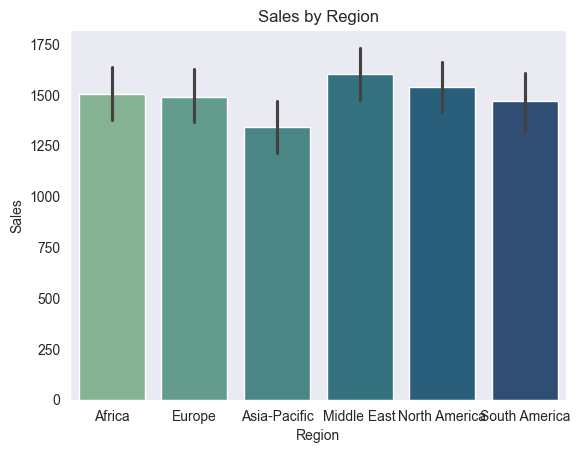

In [171]:
sns.barplot(x=data['Region'], y=data['Sales'], palette='crest', hue=data['Region'])
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

In [ ]:
sns.barplot(x='Region', y='Profit', data=data, palette='crest', hue = 'Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit by Year')
plt.show()

CustomerSegment vs. Sales/Quantity/Discount/Profit:
Relationship: Do different customer segments (e.g., Enterprise, Consumer) tend to place larger orders, receive different discounts, or generate varying levels of profit?
Visualization: Similar to 'Region vs. Numerical' (bar plots, box plots, violin plots).


Category vs. Sales/Quantity/Discount/Profit:
Relationship: Do different product categories have different average sales prices, order quantities, discount levels, or profit margins?
Visualization: 
Similar to 'Region vs. Numerical' (bar plots, box plots, violin plots).


Product vs. Sales/Quantity/Discount/Profit:
Relationship: Which products are the top sellers (by value or quantity)? Which products tend to have higher discounts or profit margins?
Visualization: Bar plots (sns.barplot(), plt.bar()) showing aggregated sales, quantity, or profit per product (potentially showing only the top N products for better readability). Box plots to see the distribution of sales or profit for individual products.


ShippingMode vs. Sales/Quantity/Discount/Profit:
Relationship: Does the chosen shipping mode correlate with the order value, quantity, or profitability (e.g., faster shipping might be chosen for higher-value items)?
Visualization: Similar to 'Region vs. Numerical' (bar plots, box plots, violin plots).

### Categorical vs. Categorical:


#### Customer

CustomerSegment vs. Category:
Relationship: Do different customer segments tend to purchase specific product categories?
Visualization: Similar to 'Region vs. CustomerSegment' (stacked/grouped bar charts, heatmaps of contingency tables).

CustomerSegment vs. ShippingMode:
Relationship: Do different customer segments prefer certain shipping modes?
Visualization: Similar to 'Region vs. CustomerSegment' (stacked/grouped bar charts, heatmaps of contingency tables).

Category vs. ShippingMode:
Relationship: Are certain product categories more likely to be shipped using specific modes?
Visualization: Similar to 'Region vs. CustomerSegment' (stacked/grouped bar charts, heatmaps of contingency tables).

#### Region

Region vs. CustomerSegment:
Relationship: Is the distribution of customer segments different across various regions?
Visualization: Stacked bar charts (plt.bar() with careful grouping), grouped bar charts (sns.countplot() with the hue parameter), heatmaps of contingency tables (using pd.crosstab() and sns.heatmap()).

Region vs. Category:
Relationship: Are certain product categories more popular in specific regions?
Visualization: Similar to 'Region vs. CustomerSegment' (stacked/grouped bar charts, heatmaps of contingency tables).

Region vs. ShippingMode:
Relationship: Are certain shipping modes preferred in different regions?
Visualization: Similar to 'Region vs. CustomerSegment' (stacked/grouped bar charts, heatmaps of contingency tables).